# Exploratory Data Analysis (EDA)
This notebook serves as an initial **Exploratory Data Analysis (EDA)** for the CIFAR-10 dataset. The goal is to:

- Understand the dataset structure, class distribution, and image properties.
- Visualise sample images from each class to gain intuitive familiarity.
- Identify any potential data issues or preprocessing considerations for downstream model training.

Performing this EDA ensures a solid foundation for building robust image classification models in subsequent experiments.

## Importing Libraries

In [1]:
# import libraries
from src.utils import ImageEDA, load_dataset

# automatically reloads python modules
%load_ext autoreload
%autoreload 2

## Download CIFAR Dataset

In [2]:
# download dataset
load_dataset('./data')

Number of training samples: 50000
Number of test samples: 10000
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## Visualise Sample Images 

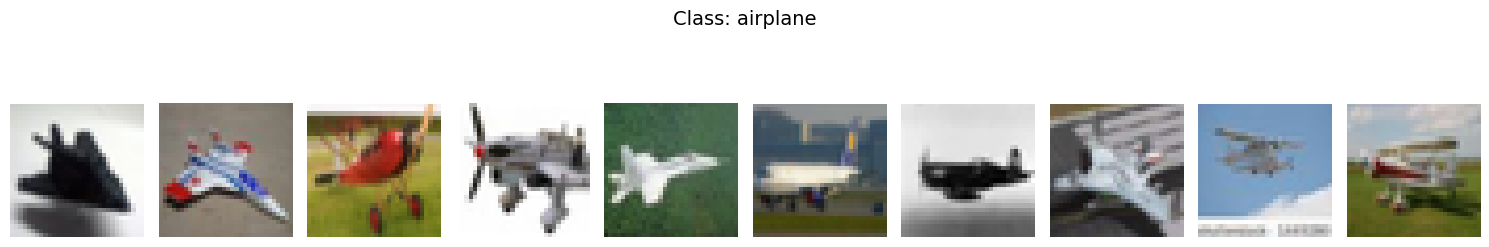

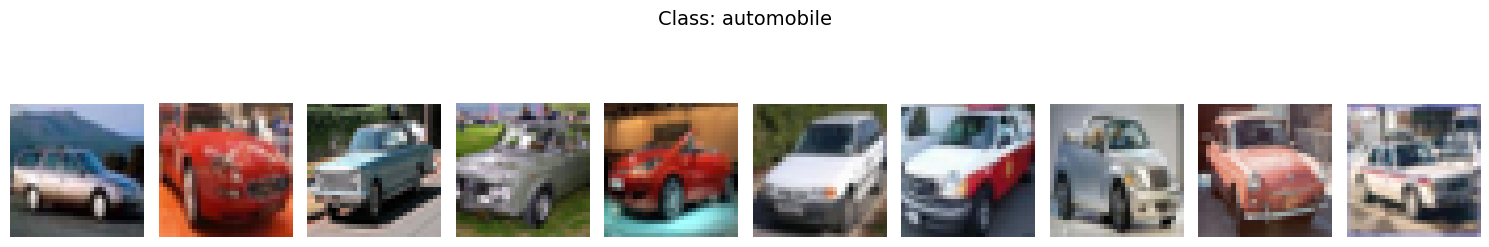

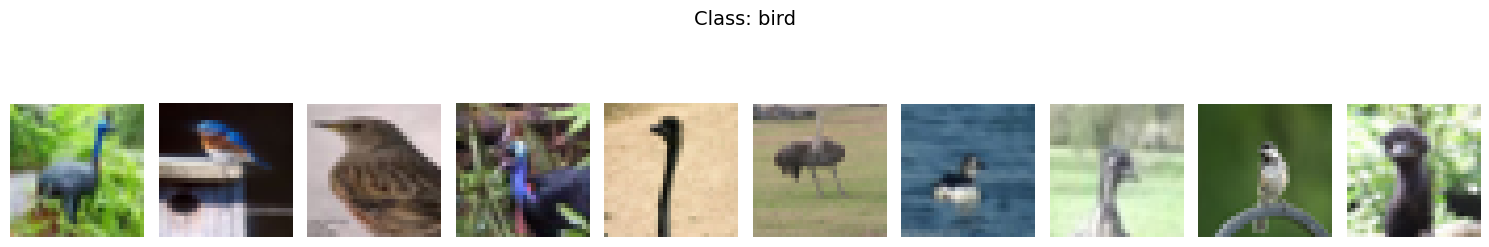

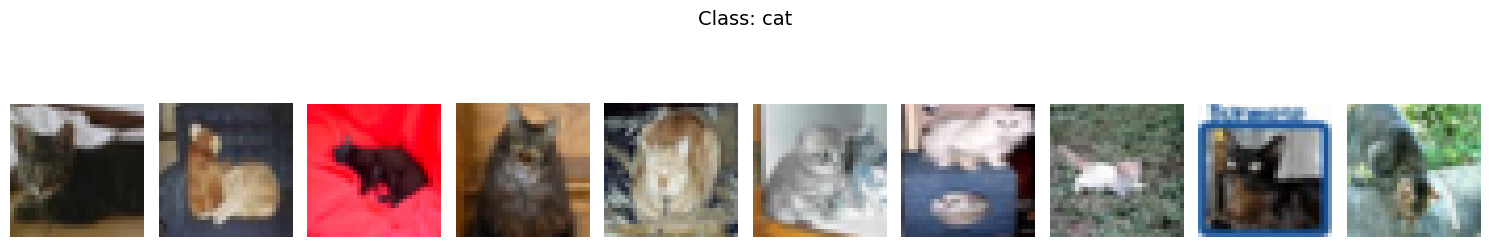

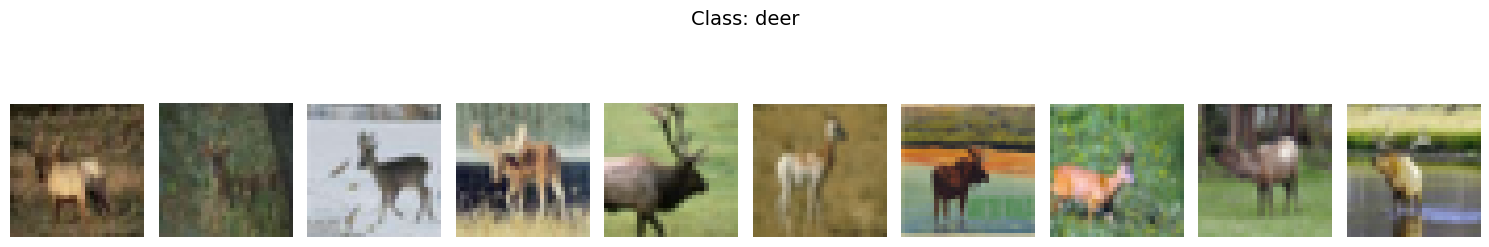

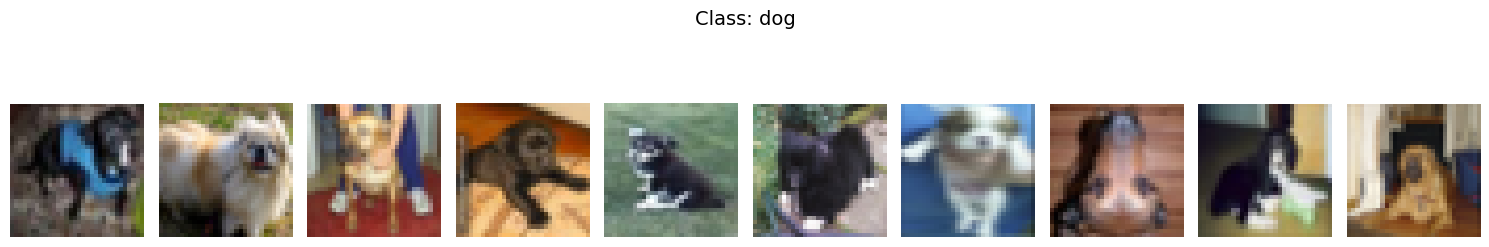

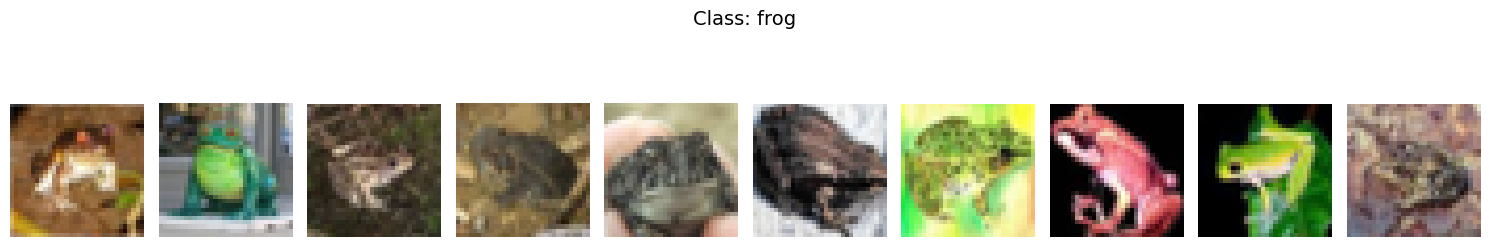

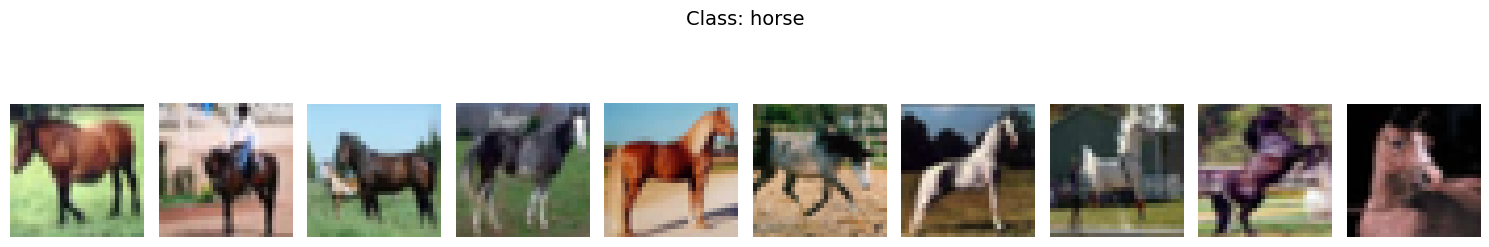

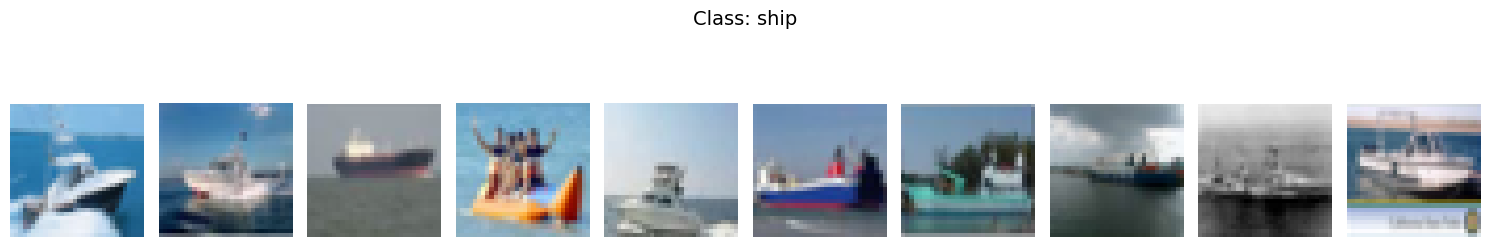

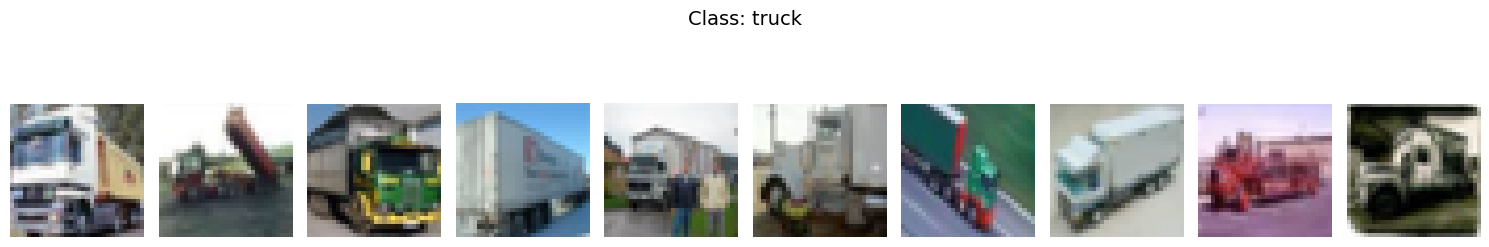

In [3]:
# instantiate ImageEDA class
eda = ImageEDA("./data")

# show sample
eda.show_sample_images(samples_per_class=10)

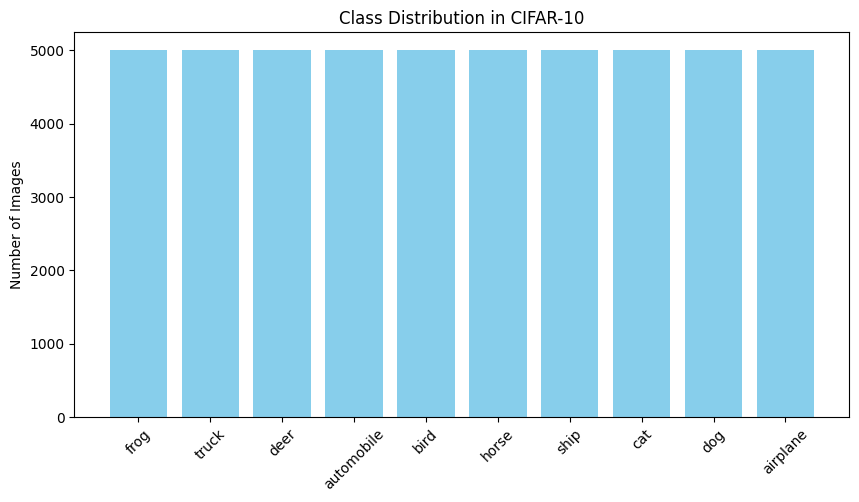

,class,count
0,frog,5000
1,truck,5000
2,deer,5000
3,automobile,5000
4,bird,5000
5,horse,5000
6,ship,5000
7,cat,5000
8,dog,5000
9,airplane,5000


In [4]:
# show distribution
eda.analyse_class_distribution()

In [5]:
# examine image properties
eda.examine_image_properties()

Sample image shape: torch.Size([3, 32, 32]) (C, H, W)
 - Channels: 3
 - Height: 32, Width: 32

All images in CIFAR-10 are expected to be 3x32x32 (RGB, 32x32 pixels).


# Similar Classes Comparison
Certain classes in CIFAR-10 share similar visual features, which can lead to higher misclassification rates between them. For example:
- **Cat vs Dog:**<br>
Both classes include four-legged animals with fur, similar colours, and overlapping shapes in low-resolution images, making them difficult to distinguish without fine-grained features such as ear shape or snout length.
- **Automobile vs Truck:**<br>
Both are vehicles with wheels and similar structures in small images. Distinguishing factors include size, cargo presence, and structural shape, which may not be visible at 32x32 resolution.

## Dog vs Cat

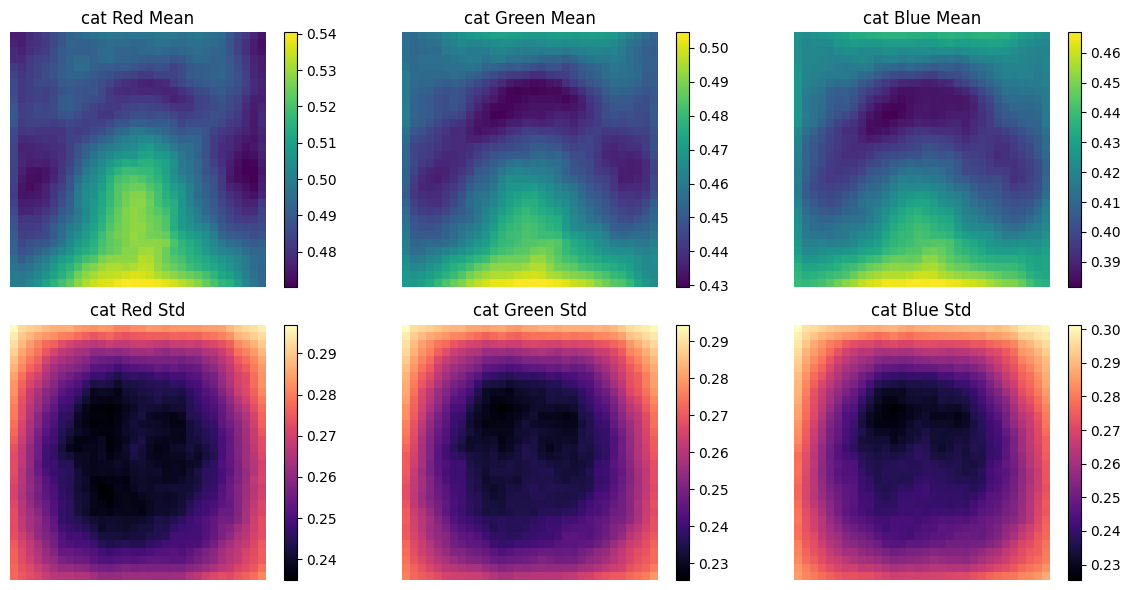

In [10]:
eda.plot_locationwise_mean_std("cat")

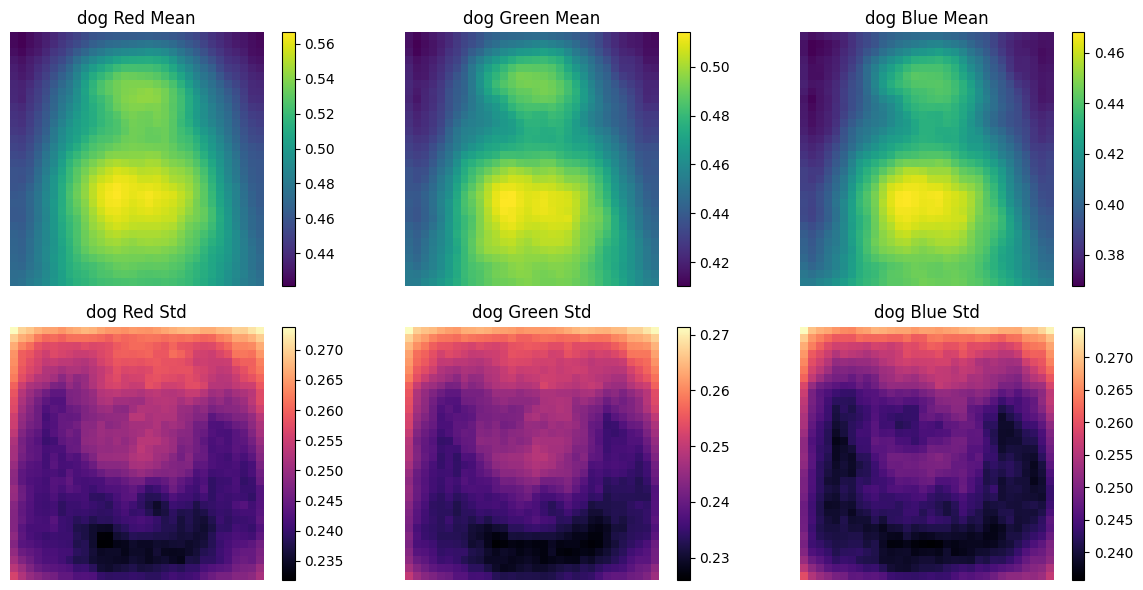

In [ ]:
eda.plot_locationwise_mean_std("dog")

## Automoile vs Car

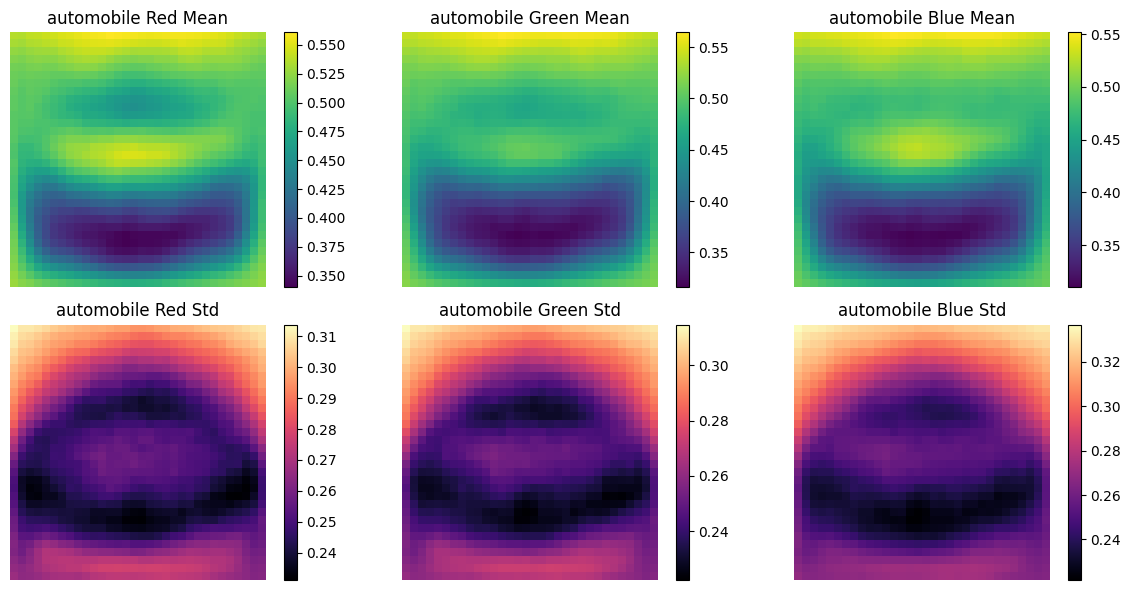

In [18]:
eda.plot_locationwise_mean_std("automobile")

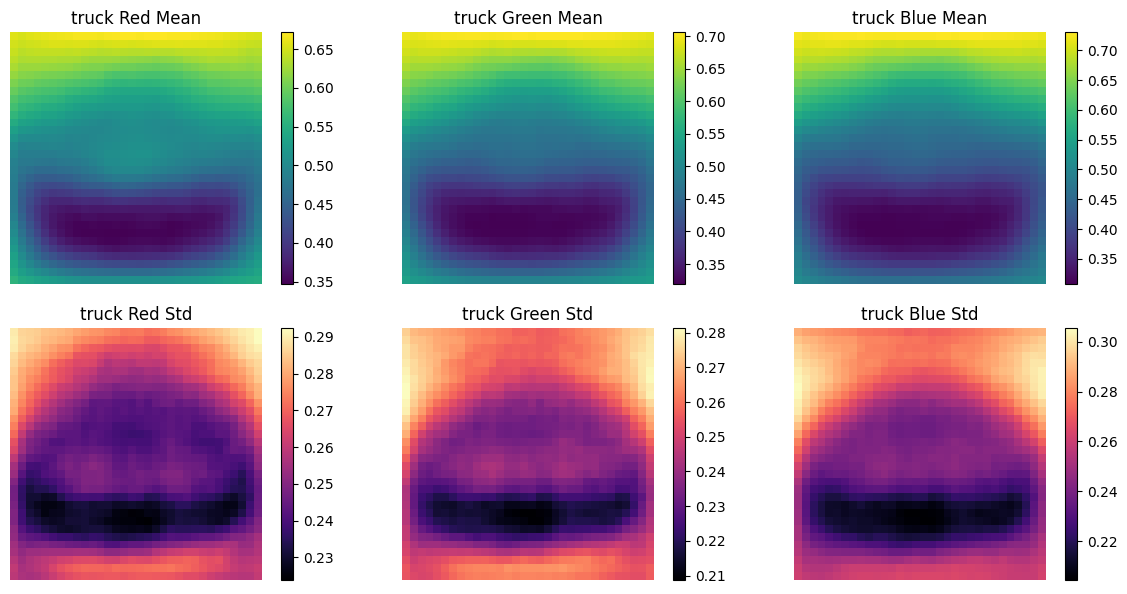

In [19]:
eda.plot_locationwise_mean_std("truck")

## Potential Challenges
- **Class imbalance:** CIFAR-10 classes are perfectly balanced, but minor variations exist that could affect model calibration.
- **Low resolution:** 32x32 images limit fine-grained feature extraction, posing challenges for complex object recognition tasks.
- **Intra-class variation:** Significant differences in pose, lighting, and background within each class increase model generalisation demands.
- **Inter-class similarity:** Some classes (e.g. cat vs dog) share visual features, increasing the risk of misclassification.

## EDA Findings and Implications
- **Balanced dataset:** Minimal need for class re-sampling strategies.
- **Consistent dimensions and channels:** All images are RGB with 32x32 size, simplifying preprocessing pipelines.
- **Data augmentation opportunities:** Techniques like flipping, cropping, and colour jittering can enhance model robustness to intra-class variation.
- **Model selection considerations:** Pre-trained or deeper architectures may be required to distinguish classes with subtle inter-class differences effectively.


Loading preprocessed ImageFolder dataset (224x224)...


/tmp/ipykernel_19554/1706076785.py:15: UserWarning: Argument(s) 'max_holes, max_height, max_width, min_holes, min_height, min_width, fill_value' are not valid for transform CoarseDropout
  A.CoarseDropout(


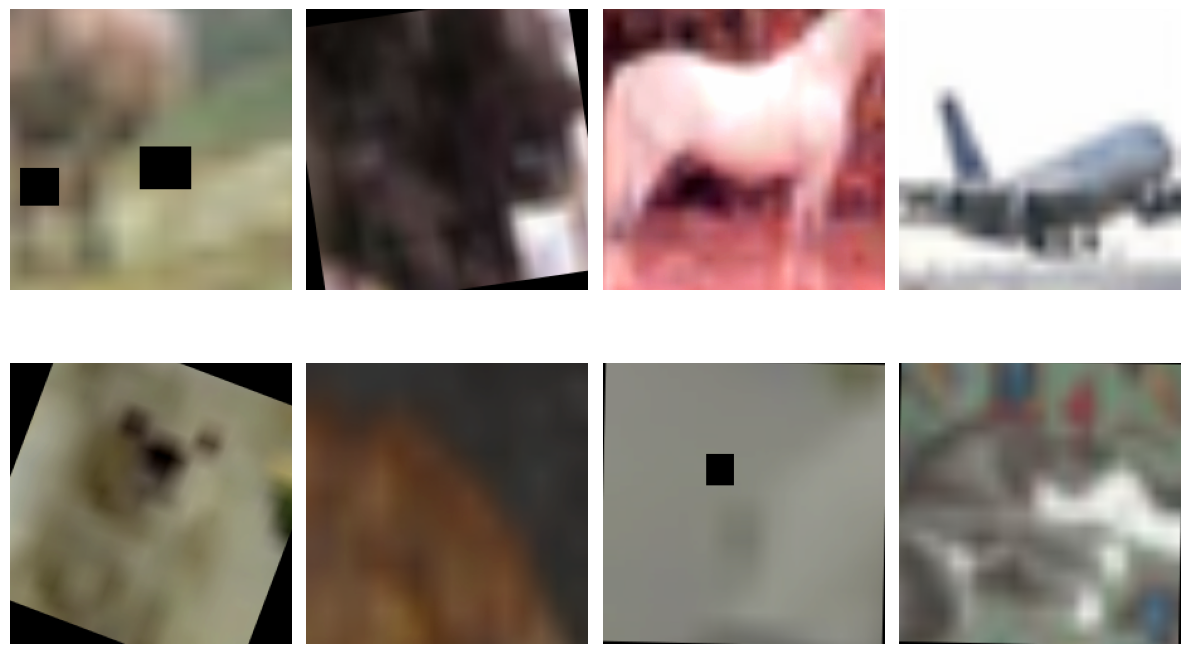

In [ ]:
# Third-party
import albumentations as A
from albumentations.pytorch import ToTensorV2
import matplotlib.pyplot as plt

# Local application imports
from src.utils import ImageLoader

# Define optimised ViT-style transforms
train_transform = A.Compose([
    A.RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.33), p=1.0),
    A.HorizontalFlip(p=0.5),
    A.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1, p=0.8),
    A.Rotate(limit=25, p=0.5),
    A.CoarseDropout(
        num_holes_range(1, 1), hole_height_range(0.1, 0.2), hole_width_range(0.1, 0.2)
        fill=0, p=0.5
    ),
    A.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]),
    ToTensorV2()
])

# Initialise loader
loader = ImageLoader(
    dataset_name="cifar10",
    data_dir="./data",
    train_transform=train_transform,
    val_transform=train_transform,
    batch_size=64,
    image_size=224
)

# Load data
train_loader, val_loader = loader.get_loaders()

# Visualise a batch to verify augmentations
def show_batch(loader):
    batch = next(iter(loader))
    images, labels = batch
    images = images.permute(0, 2, 3, 1).cpu().numpy()  # (B, H, W, C)

    # Undo normalisation for display
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    images = images * std + mean
    images = images.clip(0, 1)

    plt.figure(figsize=(12, 8))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Call visualisation function
show_batch(train_loader)
